In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
import tqdm

## AlexNet 구현해보기

In [2]:
class AlexNet(nn.Module) : 
    def __init__(self):
        super(AlexNet,self).__init__()
        self.conv1=nn.Sequential(
                nn.Conv2d(3,96,kernel_size=(4,4)),
                nn.ReLU(inplace = True)
        )
        
        self.conv2=nn.Sequential(
                nn.Conv2d(96,256,kernel_size=(5,5),padding=(2,2)),
                nn.ReLU(inplace = True),
                nn.MaxPool2d(kernel_size=3,stride=2)
        )
        
        self.conv3=nn.Sequential(
                nn.Conv2d(256,384,kernel_size=(3,3),padding=(1,1)),
                nn.ReLU(inplace=True),
                nn.Conv2d(384,384,kernel_size=(3,3),padding=(1,1)),
                nn.ReLU(inplace=True),
                nn.Conv2d(384,256,kernel_size=(3,3),padding=(1,1)),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3,stride=2)
        )
        self.fc_layer1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216,4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096,10)
        )
        
    def forward(self,x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out = out.view(-1,9216)
        out=self.fc_layer1(out)
        return out

In [7]:
net = AlexNet()
AlexNet()

AlexNet(
  (conv1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer1): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_fe

In [3]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [5]:
from torchsummary import summary

In [6]:
summary(net,(3,32,32),device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 29, 29]           4,704
              ReLU-2           [-1, 96, 29, 29]               0
            Conv2d-3          [-1, 256, 29, 29]         614,656
              ReLU-4          [-1, 256, 29, 29]               0
         MaxPool2d-5          [-1, 256, 14, 14]               0
            Conv2d-6          [-1, 384, 14, 14]         885,120
              ReLU-7          [-1, 384, 14, 14]               0
            Conv2d-8          [-1, 384, 14, 14]       1,327,488
              ReLU-9          [-1, 384, 14, 14]               0
           Conv2d-10          [-1, 256, 14, 14]         884,992
             ReLU-11          [-1, 256, 14, 14]               0
        MaxPool2d-12            [-1, 256, 6, 6]               0
          Dropout-13                 [-1, 9216]               0
           Linear-14                 [-

### 1. 데이터 전처리(이미지를 탠서화,일반화)

In [23]:
transformation = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
## 이미지 전처리인 탠서화와 일반화를 Compose로 묶어놓음

train_loader = torchvision.datasets.CIFAR10(root="./", transform=transformation,train=True)
test_loader = torchvision.datasets.CIFAR10(root="./",transform=transformation,train=False)
## cifar10의 이미지를 전부 다 전처리해서 train_loader와 test_loader에 저장
print(len(train_loader))
print(len(test_loader))

50000
10000


In [38]:
help(torchvision.datasets)

Help on package torchvision.datasets in torchvision:

NAME
    torchvision.datasets

PACKAGE CONTENTS
    _optical_flow
    _stereo_matching
    caltech
    celeba
    cifar
    cityscapes
    clevr
    coco
    country211
    dtd
    eurosat
    fakedata
    fer2013
    fgvc_aircraft
    flickr
    flowers102
    folder
    food101
    gtsrb
    hmdb51
    imagenet
    inaturalist
    kinetics
    kitti
    lfw
    lsun
    mnist
    omniglot
    oxford_iiit_pet
    pcam
    phototour
    places365
    rendered_sst2
    samplers (package)
    sbd
    sbu
    semeion
    stanford_cars
    stl10
    sun397
    svhn
    ucf101
    usps
    utils
    video_utils
    vision
    voc
    widerface

CLASSES
    torch.utils.data.dataset.Dataset(typing.Generic)
        torchvision.datasets.vision.VisionDataset
            torchvision.datasets.caltech.Caltech101
            torchvision.datasets.caltech.Caltech256
            torchvision.datasets.celeba.CelebA
            torchvision.datasets.cif

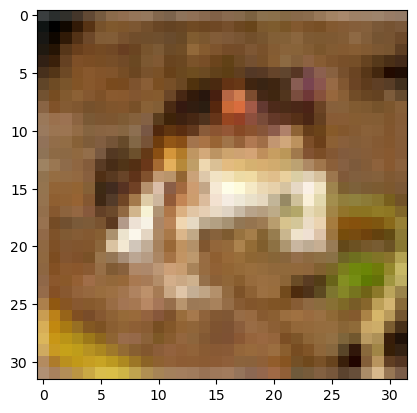

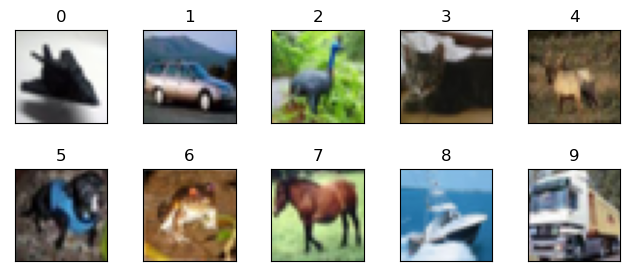

In [35]:
for img,label in (train_loader) : 
    img = img.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std* img + mean
    img = np.clip(img,0,1)
    plt.imshow(img)
    break
fig = plt.figure(figsize=(8,3))
## 위에서 이미지를 텐서화 하고 일반화 했기 때문에 원래 상태(BGR)로 되돌려야 이미지를 볼 수 있음.
    
for i in range(10) : 
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ## 2행 5열의 이미지 테이블 준비, 이미지를 출력할 원소 위치
    ax.set_title(i)
    img = next(img for img,label in train_loader if label==i)
    img = img.numpy().transpose(1,2,0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std* img + mean
    img = np.clip(img,0,1)
    plt.imshow(img)
plt.subplots_adjust(hspace=0.5)
## 이미지 테이블의 세로 간격을 조절할 수 있음.
plt.show()    
    

In [25]:
batch_size = 128
train_loader1 = torch.utils.data.DataLoader(train_loader,batch_size=batch_size,shuffle=True)
test_loader1 = torch.utils.data.DataLoader(test_loader,batch_size=batch_size,shuffle=False)

for a,b in test_loader1 : 
    print(a.shape,b)
    break
print(len(train_loader1))

torch.Size([128, 3, 32, 32]) tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3])
391


### 옵티마이저와 손실함수 준비

In [8]:
optimizer = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()

In [39]:
help(optim)

Help on package torch.optim in torch:

NAME
    torch.optim

DESCRIPTION
    :mod:`torch.optim` is a package implementing various optimization algorithms.
    Most commonly used methods are already supported, and the interface is general
    enough, so that more sophisticated ones can be also easily integrated in the
    future.

PACKAGE CONTENTS
    _functional
    _multi_tensor (package)
    adadelta
    adagrad
    adam
    adamax
    adamw
    asgd
    lbfgs
    lr_scheduler
    nadam
    optimizer
    radam
    rmsprop
    rprop
    sgd
    sparse_adam
    swa_utils

FILE
    c:\users\ksk\anaconda3\envs\pytlesson\lib\site-packages\torch\optim\__init__.py




In [9]:
def eval_model(model,data_loader,device="cuda:0") : 
    model.eval()
    ys = []
    ypreds=[]
    for x,y in data_loader : 
        x = x.to(device)
        y = y.to(device)
        with torch.no_grad():
            _,y_pred = model(x).max(1)
        ys.append(y)
        ypreds.append(y_pred)
        
    ys = torch.cat(ys)
    ypreds = torch.cat(ypreds)
    acc = (ys==ypreds).float().sum()/len(ys)
    return acc.item()
        

### 훈련 코드 짜기

In [12]:
device = 'cuda:0'
net.to(device)
EPOCHS=4
log_train_loss=[]
log_train_acc=[]
log_valid_acc=[]


for epoch in range(EPOCHS):
    epoch_loss = 0.0
    n=0
    acc=0
    i = 0
    net.train()
    for I,(img,label) in tqdm.tqdm(enumerate(train_loader1),total = len(train_loader1)) :
        ## 50000만장의 훈련 데이터를 128 미니배치로 학습하므로 한 에포크 당 for문은 총 391번 돌게된다.
        img=img.to(device)
        label=label.to(device)
        h=net(img)
        loss=loss_fn(h,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()
        n += len(img)
        _,y_pred = h.max(1)
        acc += (label==y_pred).sum().item()
    log_train_loss.append(epoch_loss/len(img))
    ## 한 에포크당 손실
    log_train_acc.append(acc/n)
    ## 한 에포크당 정확성 n=128*391
    log_valid_acc.append(eval_model(net,test_loader1,device))
    ## 한 에포크당 테스트용 데이터의 정확성
    print(epoch,log_train_loss[-1],log_train_acc[-1],log_valid_acc[-1],flush=True)
    
        
        

100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [01:04<00:00,  6.08it/s]


0 4.631671568751335 0.66744 0.7069999575614929


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [01:04<00:00,  6.05it/s]


1 4.121691561490297 0.70648 0.7251999974250793


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [01:04<00:00,  6.07it/s]


2 3.7673104628920555 0.72918 0.7427999973297119


100%|████████████████████████████████████████████████████████████████████████████████| 391/391 [01:04<00:00,  6.07it/s]


3 3.443892255425453 0.75184 0.7400999665260315


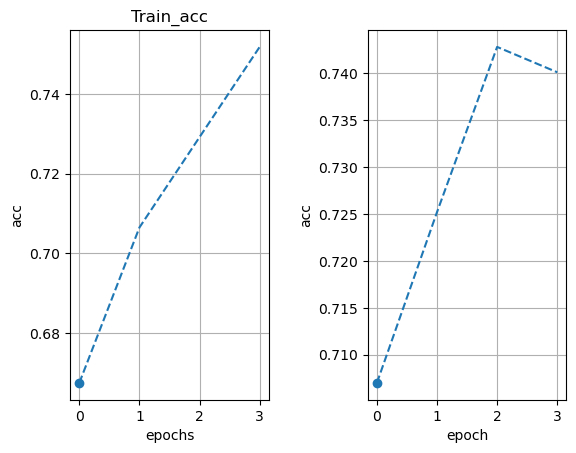

In [36]:
plt.subplot(1,2,1)
plt.plot(range(4),log_train_acc,'o--',markevery=10)
plt.title("Train_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.grid()


plt.subplot(1,2,2)
plt.plot(range(4),log_valid_acc,'o--',markevery=10)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.grid()
plt.subplots_adjust(wspace=0.5)
## 각 그래프의 가로 간격을 조정하는 메서드
plt.show()